# Fokas Lennelles Equation

![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gautamksaharia/Fokas-Lenells/blob/main/FLE_bright_2SS.ipynb)

$$u_{xt} - u  + 2 i|u|^2u_x=0$$

$x \quad ϵ \quad  [-1,1]$

$t \quad ϵ \quad  [0,1]$

$$(r +im)_{xt} - (r+im)  + 2 i(r^2 + m^2)(r+im)_x=0$$
**1. Real part**
$$r_{xt} - r  -2 (r^2 + m^2)m_x=0$$
2. **Imaginary part**
$$m_{xt} - m  +2 (r^2 + m^2)r_x=0$$

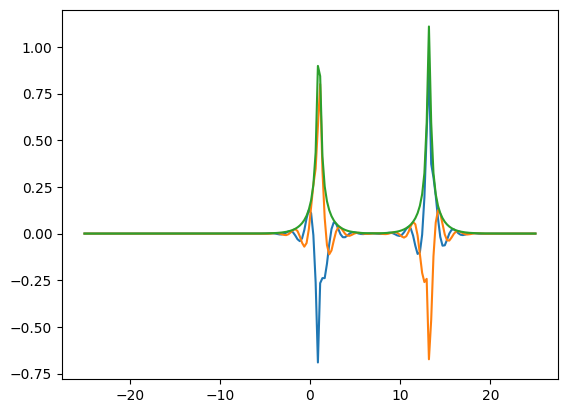

In [1]:
import numpy as np
import matplotlib.pyplot as plt





def FLE_1(X,t):
  a1 = 1;
  b1 = 3;
  a2 = 1;
  b2 = 3.01;

  P1 = a1 + b1*1j;
  P1c = a1 - b1*1j;

  P2 = a2 + b2*1j;
  P2c = a2 - b2*1j;

  Alpha1 = 1 + 1j;
  Alpha1c = 1 - 1j;

  Alpha2 = 3 + 2j;
  Alpha2c = 3 - 2j;

  Beta1 = 1 + 3j;
  Beta1c = 1 - 3j;


  Alpha3 = (1j*P1c**3*(P1 - P2)**2*Alpha1*Alpha1c*Alpha2)/((P1 +P1c)**2*(P1c + P2)**2*Beta1*Beta1c);

  Alpha4 = (1j*(P1 - P2)**2*P2c**3*Alpha1*Alpha2*Alpha2c)/((P1 + P2c)**2*(P2 + P2c)**2*Beta1*Beta1c);

  Beta2 = (1j*Alpha1*Alpha1c*P1**2*P1c )/(Beta1c*(P1 + P1c)**2);

  Beta3 = (1j*Alpha2*Alpha2c*P2**2*P2c )/(Beta1c*(P2 + P2c)**2);

  Beta4 = (1j*Alpha1*Alpha2c*P1**2*P2c )/(Beta1c*(P1 + P2c)**2);

  Beta5 = (1j*Alpha2*Alpha1c*P2**2*P1c )/(Beta1c*(P1c + P2)**2);

  Beta6 = -((P1**2*P1c*(P1 - P2)**2*P2**2*(P1c -P2c)**2*P2c*Alpha1*Alpha1c*Alpha2*Alpha2c)/((P1 +P1c)**2*(P1c + P2)**2*(P1 + P2c)**2*(P2 +P2c)**2*Beta1*Beta1c**2));

  Chi10 = 0;
  Chi20 = 0;
  Theta1 = a1*X + a1/(a1**2 + b1**2)*t;
  Theta2 = a2*X + a2/(a2**2 + b2**2)*t;
  Chi1 = b1*X - b1/(a1**2 + b1**2)*t + Chi10;
  Chi2 = b2*X - b2/(a2**2 + b2**2)*t + Chi20;


  q = (Alpha1*np.exp(Theta1 + 1j*Chi1) + Alpha2*np.exp(Theta2 + 1j*Chi2) + Alpha3*np.exp(2*Theta1 + Theta2 + 1j*Chi2) + Alpha4*np.exp(2*Theta2 + Theta1 +
        1j*Chi1))/(Beta1 + Beta2*np.exp(2*Theta1) + Beta3*np.exp(2*Theta2) + Beta4*np.exp(Theta1 +Theta2 + 1j*(Chi1-Chi2) ) + Beta5*np.exp(Theta1 + Theta2 +
        1j*(Chi2 -Chi1)) + Beta6*np.exp(2*Theta1 + 2*Theta2))


# at time t=-25
  q_real = np.real(q)
  q_imag = np.imag(q)

  return q_real, q_imag

X=np.linspace(-25, 25, 200)
t=-25
q_real, q_imag = FLE_1(X,t)

#print(q_imag)


#plt.plot(X, np.abs(q))
plt.plot(X, q_real)
plt.plot(X, q_imag)
plt.plot(X, np.sqrt(q_imag**2 + q_real**2))

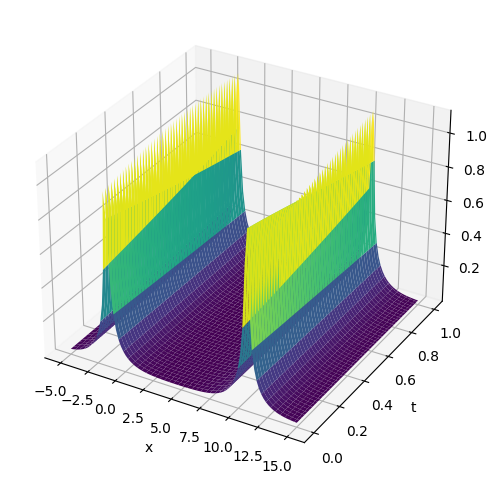

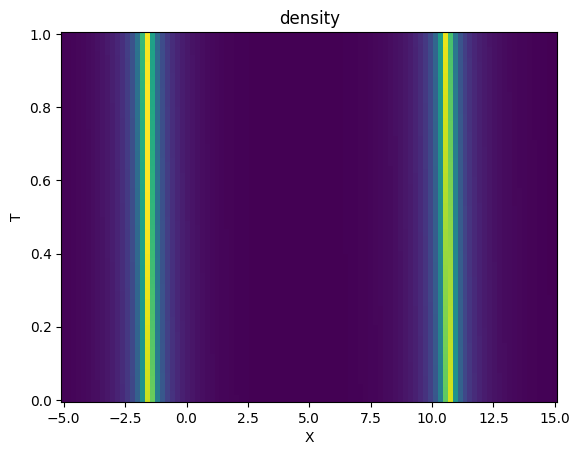

In [2]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt


N =100
x_min = -5
x_max = 15
t_min = 0
t_max = 1
x_space = np.linspace(x_min, x_max, N)
t_space = np.linspace(t_min, t_max, N)
XX, TT = np.meshgrid(x_space, t_space)


qq_real, qq_imag = FLE_1(XX, TT)



UU = np.sqrt(qq_real**2 + qq_imag**2)



fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.plot_surface(XX, TT, UU, cmap="viridis")
plt.xlabel("x")
plt.ylabel("t")
plt.show()



plt.pcolor(XX, TT, UU, cmap="viridis")
plt.xlabel("X")
plt.ylabel("T")
plt.title("density")
#plt.savefig("error.png", dpi='figure', transparent = True)
plt.show()


PINN to solve PDE

In [3]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
torch.manual_seed(123)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


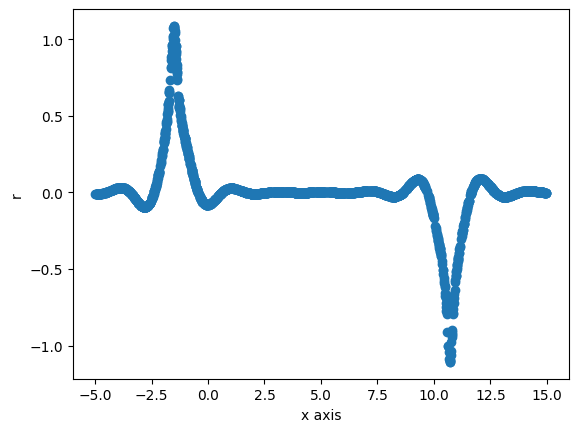

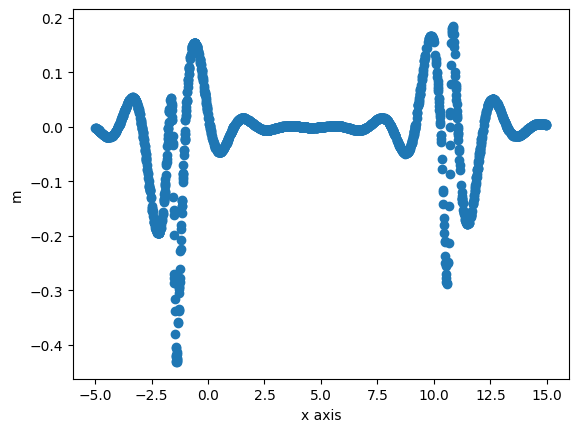

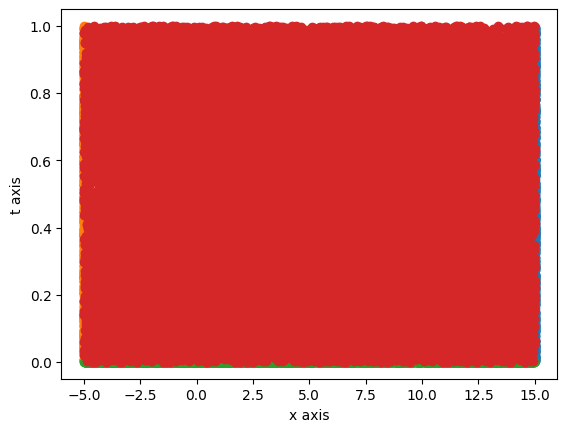

In [4]:


N_0 = 2000
N_b = 500
N_r = 25000
np.random.seed(2)

#initial at U(x, t=0)
x_0 = np.random.uniform(low=x_min, high=x_max, size=(N_0, 1))
t_0 = np.ones((N_0, 1), dtype=np.float64)*t_min

r_0, m_0 = FLE_1(x_0, t_min)


t_b1 = np.random.uniform(low=t_min, high=t_max, size=(N_b, 1))
x_b1 = np.ones((N_b, 1), dtype=np.float64)*x_min
#Dirichlet BC
U_b1 = np.ones((N_b, 1), dtype=np.float64)*0

t_b2 = np.random.uniform(low=t_min, high=t_max, size=(N_b, 1))
x_b2 = np.ones((N_b, 1), dtype=np.float64)*x_max
#Dirichlet BC
U_b2 = np.ones((N_b, 1), dtype=np.float64)*0


x_c = np.random.uniform(low=x_min, high=x_max, size=(N_r, 1))
t_c = np.random.uniform(low=t_min, high=t_max, size=(N_r, 1))



plt.scatter(x_0, r_0)
plt.xlabel("x axis")
plt.ylabel("r")
plt.show()

plt.scatter(x_0, m_0)
plt.xlabel("x axis")
plt.ylabel("m")
plt.show()


plt.scatter(x_b2, t_b2)
plt.scatter(x_b1, t_b1)
plt.scatter(x_0, t_0)
plt.scatter(x_c, t_c)
plt.xlabel("x axis")
plt.ylabel("t axis")
plt.show()

#Neural Network

## We consider Neural Network as our solution u(x,t)

In [5]:


class Neural_network(nn.Module):
  def __init__(self):
    super(Neural_network, self).__init__()
    self.input_layer = nn.Linear(2,60)

    #self.dropout = nn.Dropout(0.25)
    self.hidden_layer1 = nn.Linear(60,60)
    self.hidden_layer2 = nn.Linear(60,60)
    self.hidden_layer3 = nn.Linear(60,60)
    self.hidden_layer4 = nn.Linear(60,60)
    self.hidden_layer5 = nn.Linear(60,60)
    self.hidden_layer6 = nn.Linear(60,60)
    self.hidden_layer7 = nn.Linear(60,60)
    self.hidden_layer8 = nn.Linear(60,60)
    self.hidden_layer9 = nn.Linear(60,60)
    self.hidden_layer10 = nn.Linear(60,60)
    self.hidden_layer11 = nn.Linear(60,60)
    self.output_layer = nn.Linear(60,2)

  def forward(self, x):

    x = self.input_layer(x)
    x = torch.tanh(x)
    x = torch.tanh(self.hidden_layer1(x))
    x = torch.tanh(self.hidden_layer2(x))

    #x = self.dropout(x)
    x = torch.tanh(self.hidden_layer3(x))
    x = torch.tanh(self.hidden_layer4(x))
    x = torch.tanh(self.hidden_layer5(x))
    x = torch.tanh(self.hidden_layer6(x))
    x = torch.tanh(self.hidden_layer7(x))
    x = torch.tanh(self.hidden_layer8(x))
    x = torch.tanh(self.hidden_layer9(x))
    x = torch.tanh(self.hidden_layer10(x))
    x = torch.tanh(self.hidden_layer11(x))
    x = self.output_layer(x)
    return x

In [6]:
Net = Neural_network()
Net = Net.to(device)
loss_fu = nn.MSELoss()
optim = torch.optim.Adam(Net.parameters(), lr=0.001)

In [7]:
#initail
x_01 = torch.autograd.Variable( torch.from_numpy(x_0).float(), requires_grad=False).to(device)
t_01 = torch.autograd.Variable( torch.from_numpy(t_0).float(), requires_grad=False).to(device)
R_01 = torch.autograd.Variable( torch.from_numpy(r_0).float(), requires_grad=False).to(device)
M_01 = torch.autograd.Variable( torch.from_numpy(m_0).float(), requires_grad=False).to(device)
X_0 = torch.cat([x_01, t_01], axis=1)

#BC1
x_b11 = torch.autograd.Variable( torch.from_numpy(x_b1).float(), requires_grad=True).to(device)
t_b11 = torch.autograd.Variable( torch.from_numpy(t_b1).float(), requires_grad=False).to(device)
U_b11 = torch.autograd.Variable( torch.from_numpy(U_b1).float(), requires_grad=False).to(device)
X_b1 = torch.cat([x_b11, t_b11], axis=1)

#BC2
x_b21 = torch.autograd.Variable( torch.from_numpy(x_b2).float(), requires_grad=True).to(device)
t_b21 = torch.autograd.Variable( torch.from_numpy(t_b2).float(), requires_grad=False).to(device)
U_b21 = torch.autograd.Variable( torch.from_numpy(U_b2).float(), requires_grad=False).to(device)
X_b2 = torch.cat([x_b21, t_b21], axis=1)



NORMALIZE

# PDE Loss

In [8]:
def pde(x, t, Net):
  x_1 = torch.autograd.Variable( torch.from_numpy(x).float(), requires_grad=True).to(device)
  t_1 = torch.autograd.Variable( torch.from_numpy(t).float(), requires_grad=True).to(device)
  X = torch.cat([x_1, t_1], axis=1)

  rr = Net.forward(X)[:, 0:1]
  mm = Net.forward(X)[:, 1:2]

  r_x = torch.autograd.grad(rr.sum(), x_1, create_graph=True)[0]
  r_xx = torch.autograd.grad(r_x.sum(), x_1, create_graph=True)[0]
  r_xxx = torch.autograd.grad(r_xx.sum(), x_1, create_graph=True)[0]
  r_t = torch.autograd.grad(rr.sum(), t_1, create_graph=True)[0]
  r_xt = torch.autograd.grad(r_t.sum(), x_1, create_graph=True)[0]

  m_x = torch.autograd.grad(mm.sum(), x_1, create_graph=True)[0]
  m_xx = torch.autograd.grad(m_x.sum(), x_1, create_graph=True)[0]
  m_xxx = torch.autograd.grad(m_xx.sum(), x_1, create_graph=True)[0]
  m_t = torch.autograd.grad(mm.sum(), t_1, create_graph=True)[0]
  m_xt = torch.autograd.grad(m_t.sum(), x_1, create_graph=True)[0]


  pde1 = r_xt - rr - 2*(rr**2 + mm**2)*m_x
  pde2 = m_xt - mm  + 2*(rr**2 + mm**2)*r_x


  def integral_approximation(f, aa):
    return (aa.max() - aa.min() )*torch.mean(f)


  # H1
  H = (r_x**2 + m_x**2)
  H1 = integral_approximation(H, x_1 )
  H1_t = torch.autograd.grad(H1.sum(), t_1, create_graph=True)[0]

  """

  #H3
  H3_real = (r_x**2 + m_x**2)**2 - r_xx*m_x + r_x*m_xx
  H3_imag = -(r_x*r_xx + m_x*m_xx)

  H3_real_integrate = integral_approximation(H3_real, x_1 )
  H3_imag_integrate = integral_approximation(H3_imag, x_1 )

  H3r_t = torch.autograd.grad(H3_real_integrate.sum() , t_1, create_graph=True)[0]
  H3m_t = torch.autograd.grad(H3_imag_integrate.sum() , t_1, create_graph=True)[0]

  #H5
  H5_real = -(r_x*r_xxx + m_x*m_xxx) + 2*(r_x**2 + m_x**2)**3 + 3*(r_x**2 + m_x**2)*(r_x*m_xx -r_xx*m_x)
  H5_imag = -(-r_xxx*m_x + r_x*m_xxx) - 3*(r_x**2 + m_x**2)*(r_x*r_xx + m_x*m_xx)

  H5_real_integrate = integral_approximation(H5_real, x_1 )
  H5_imag_integrate = integral_approximation(H5_imag, x_1 )

  H5r_t = torch.autograd.grad(H5_real_integrate.sum() , t_1, create_graph=True)[0]
  H5m_t = torch.autograd.grad(H5_imag_integrate.sum() , t_1, create_graph=True)[0]

  #H-1
  H11_real = -rr*m_x + r_x*mm
  H11_imag = -r_x*rr - mm*m_x

  H11_real_integrate = integral_approximation(H11_real, x_1 )
  H11_imag_integrate = integral_approximation(H11_imag, x_1 )

  H11r_t = torch.autograd.grad(H11_real_integrate.sum() , t_1, create_graph=True)[0]
  H11m_t = torch.autograd.grad(H11_imag_integrate.sum(), t_1, create_graph=True)[0]

  #H-3
  H33_real = -(rr**2 + mm**2) - (rr**2+mm**2)*(rr*m_x - r_x*mm)
  H33_imag = -(rr**2 + mm**2)*(rr*r_x + mm*m_x)

  H33_real_integrate = integral_approximation(H33_real, x_1 )
  H33_imag_integrate = integral_approximation(H33_imag, x_1 )

  H33r_t = torch.autograd.grad(H33_real_integrate.sum() , t_1, create_graph=True)[0]
  H33m_t = torch.autograd.grad(H33_imag_integrate.sum(), t_1, create_graph=True)[0]
  """





  return pde1, pde2, H1_t #, H3r_t, H3m_t, H5r_t, H5m_t, H11r_t, H11m_t, H33r_t, H33m_t

#Loss

epoch:0, loss:0.53655410, loss_pde:2.39602494, , loss_b1:0.00018776, loss_b2:0.00018886
epoch:200, loss:0.24189256, loss_pde:64.92304993, , loss_b1:0.00027923, loss_b2:0.00120607
epoch:400, loss:0.23411717, loss_pde:63.49193192, , loss_b1:0.00027087, loss_b2:0.00018068
epoch:600, loss:0.21658322, loss_pde:56.16479492, , loss_b1:0.00030883, loss_b2:0.00003556
epoch:800, loss:0.21868856, loss_pde:34.19493866, , loss_b1:0.00182681, loss_b2:0.00272811
epoch:1000, loss:0.20843507, loss_pde:28.44756699, , loss_b1:0.00007656, loss_b2:0.00603528
epoch:1200, loss:0.20618920, loss_pde:22.58465958, , loss_b1:0.00092561, loss_b2:0.01176162
epoch:1400, loss:0.17716993, loss_pde:21.20429993, , loss_b1:0.00022928, loss_b2:0.00159221
epoch:1600, loss:0.17227462, loss_pde:21.21711922, , loss_b1:0.00021000, loss_b2:0.00139180
epoch:1800, loss:0.22839227, loss_pde:44.60607529, , loss_b1:0.00020073, loss_b2:0.00340345
epoch:2000, loss:0.11175083, loss_pde:54.15271378, , loss_b1:0.00018920, loss_b2:0.00359

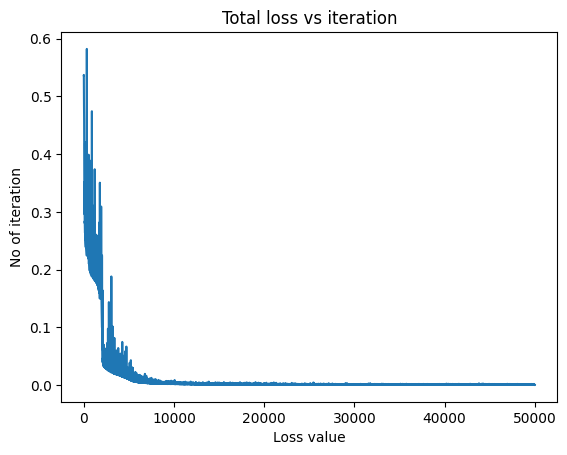

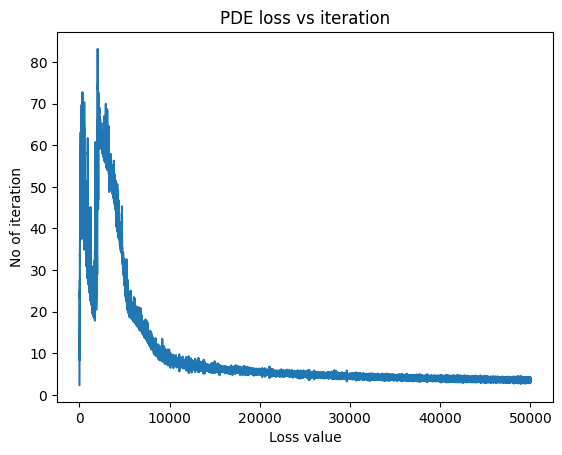

In [9]:
import time


number_of_epoch =50000
loss_value = []
loss_value1 = []


start_time = time.time()

for epoch in range(number_of_epoch):
  optim.zero_grad()       # make the gradient zero

  r_pred_0, m_pred_0  = Net.forward(X_0)[:, 0:1], Net.forward(X_0)[:, 1:2]      #forward pass
  Loss_initial = loss_fu(r_pred_0, R_01 ) + loss_fu(m_pred_0, M_01 )    # loss of initial

  r_pred_b1, m_pred_b1 = Net.forward(X_b1)[:, 0:1], Net.forward(X_b1)[:, 1:2]
  Loss_b1 = loss_fu(r_pred_b1, U_b11) + loss_fu(m_pred_b1, U_b11)             # left boudary loss

  r_pred_b2, m_pred_b2 = Net.forward(X_b2)[:, 0:1], Net.forward(X_b2)[:, 1:2]
  Loss_b2 = loss_fu(r_pred_b2, U_b21) + loss_fu(r_pred_b2, U_b21)            #right boundary loss

  r_pred_b1_x = torch.autograd.grad(r_pred_b1.sum(), x_b11, create_graph=True)[0]
  m_pred_b1_x = torch.autograd.grad(m_pred_b1.sum(), x_b11, create_graph=True)[0]

  r_pred_b2_x = torch.autograd.grad(r_pred_b2.sum(), x_b21, create_graph=True)[0]
  m_pred_b2_x = torch.autograd.grad(m_pred_b2.sum(), x_b21, create_graph=True)[0]

  loss_b3 = loss_fu(r_pred_b1_x, r_pred_b2_x)
  loss_b4 = loss_fu(m_pred_b1_x, m_pred_b2_x)


  pdee1, pdee2, H1_t = pde(x_c, t_c, Net)                   # pde losss
  Loss_pde = torch.linalg.norm(pdee1) + torch.linalg.norm(pdee2)

  Loss_conserve1 = 0.5*torch.linalg.norm(H1_t)
  #Loss_conserve3 = 0.5*(torch.linalg.norm(H3r_t) + torch.linalg.norm(H3m_t))
  #Loss_conserve5 = torch.linalg.norm(H5r_t) + torch.linalg.norm(H5m_t)
  #Loss_conserve11 = 0.5*(torch.linalg.norm(H11r_t) + torch.linalg.norm(H11m_t))
  #Loss_conserve33 = 0.5*(torch.linalg.norm(H33r_t) + torch.linalg.norm(H33m_t))


  total_loss =  (10*Loss_initial +  Loss_b1 + Loss_b2) + 0.0001*Loss_pde + 0.0001*(Loss_conserve1)      # total loss

  total_loss.backward()    # computing gradients using backward propagation  dL/dw
  optim.step()             # This is equivalent to : Weight_new = weight_old - learing_rate * derivative of Loss w.r.t weight

  loss_value.append(total_loss.cpu().detach().numpy())
  loss_value1.append(Loss_pde.cpu().detach().numpy())
  with torch.autograd.no_grad():
    if epoch%200==0:
      print(f'epoch:{epoch}, loss:{total_loss.item():.8f}, loss_pde:{Loss_pde.item():.8f}, , loss_b1:{Loss_b1.item():.8f}, loss_b2:{Loss_b2.item():.8f}')


print("total time:",time.time() - start_time, "seconds")


plt.plot(loss_value)
plt.title("Total loss vs iteration")
plt.xlabel("Loss value")
plt.ylabel("No of iteration")
plt.savefig("total_loss_curve.png", dpi='figure', transparent = True)
plt.show()

plt.plot(loss_value1)
plt.title("PDE loss vs iteration")
plt.xlabel("Loss value")
plt.ylabel("No of iteration")
plt.savefig("pde_loss_curve.png", dpi='figure', transparent = True)
plt.show()

In [10]:
a = np.array(loss_value)
b = np.array(loss_value1)


# original PINN
np.savetxt('loss_value_total_PH1_2Soliton.csv', a, delimiter=',')
np.savetxt('loss_value_pde_PH1_2soliton.csv', b, delimiter=',')

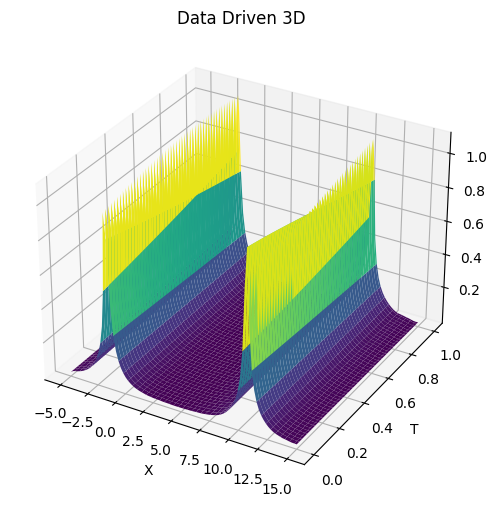

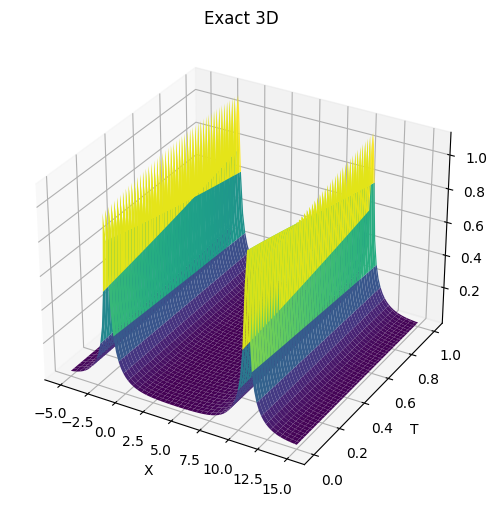

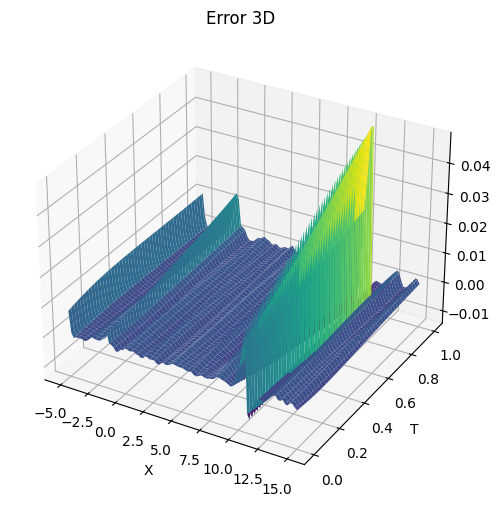

In [11]:
#plot


X = np.hstack((XX.flatten()[:, None], TT.flatten()[:, None]))
X_tensor = torch.from_numpy(X).float().to(device)

R_pred = Net.forward(X_tensor)[:, 0:1] # if use GPU
R_pred1 = R_pred.detach().cpu().numpy().reshape(N, N)

M_pred = Net.forward(X_tensor)[:, 1:2] # if use GPU
M_pred1 = M_pred.detach().cpu().numpy().reshape(N, N)



from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.plot_surface(XX, TT, np.sqrt(R_pred1**2 + M_pred1**2), cmap="viridis")
plt.xlabel("X")
plt.ylabel("T")
plt.title("Data Driven 3D")
plt.savefig("datadriven_brigh1ss_3d.png", dpi='figure', transparent = True)
plt.show()


fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.plot_surface(XX, TT, UU, cmap="viridis")
plt.xlabel("X")
plt.ylabel("T")
plt.title("Exact 3D")
plt.savefig("exact_brigh1ss_3d.png", dpi='figure', transparent = True)
plt.show()

fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.plot_surface(XX, TT, UU-np.sqrt(R_pred1**2 + M_pred1**2), cmap="viridis")
plt.xlabel("X")
plt.ylabel("T")
plt.title("Error 3D")
plt.savefig("error_brigh1ss_3d.png", dpi='figure', transparent = True)
plt.show()



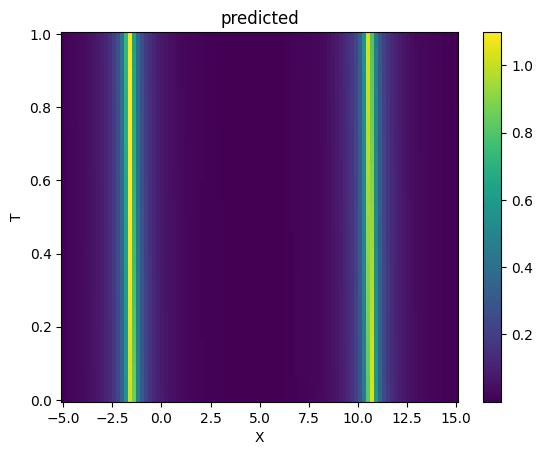

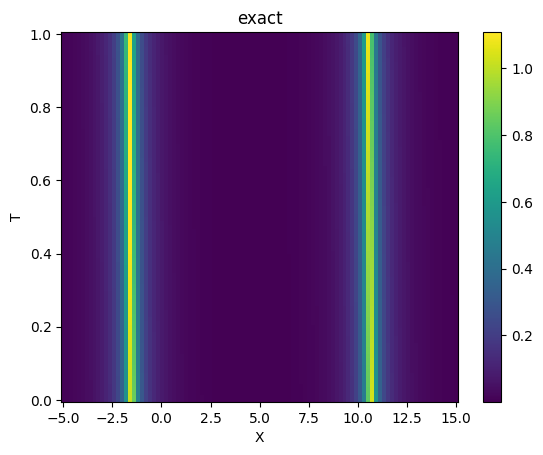

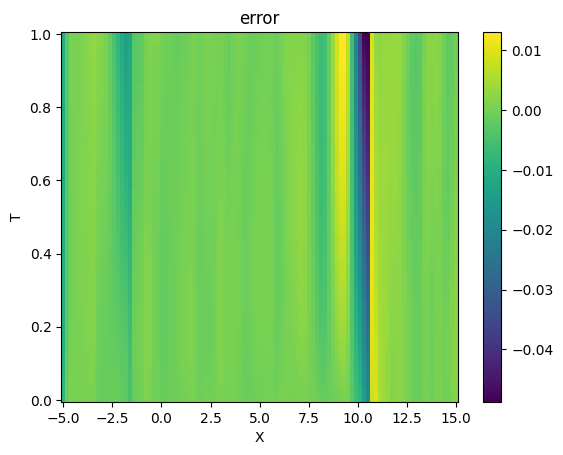

In [12]:
plt.pcolor(XX, TT, np.sqrt(R_pred1**2 + M_pred1**2), cmap="viridis")
plt.title("predicted")
plt.xlabel("X")
plt.ylabel("T")
plt.colorbar()
plt.savefig("datadriven_brigh2ss.pdf", dpi='figure', transparent = True)
plt.show()

plt.pcolor(XX, TT, UU, cmap="viridis")
plt.title("exact")
plt.xlabel("X")
plt.ylabel("T")
plt.colorbar()
plt.savefig("exact_brigh2ss.pdf", dpi='figure', transparent = True)
plt.show()

error = np.sqrt(R_pred1**2 + M_pred1**2) -UU
plt.pcolor(XX, TT, error, cmap="viridis")
plt.xlabel("X")
plt.ylabel("T")
plt.title("error")
plt.colorbar()
plt.savefig("error2ss.pdf", dpi='figure', transparent = True)
plt.show()

1.09830904006958
1.09609375
1.0937180519104004
1.0913589477539063
1.0891966819763184
1.0872694969177246
1.0854520797729492
1.0835009574890138
1.0811232566833497
1.078076457977295


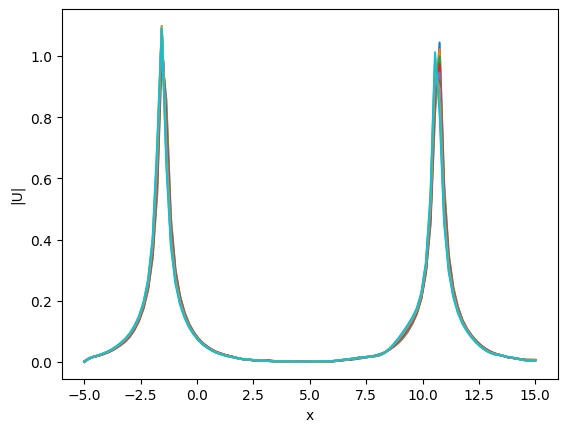

In [13]:
U_predicted= np.sqrt(R_pred1**2 + M_pred1**2)
for ml in range(0 , N, 10):
  plt.plot(x_space, U_predicted[ml, :])
  plt.xlabel("x")
  plt.ylabel("|U|")
  print((  (x_space[-1]- x_space[0] )/N ) * np.sum(U_predicted[ml, :]**2))

1.105491933467603
1.1054916879642946
1.1062801629630987
1.107775811247423
1.1098242300334968
1.112216603908059
1.1147137285628315
1.117071913165162
1.119067137872856
1.1205147718782698


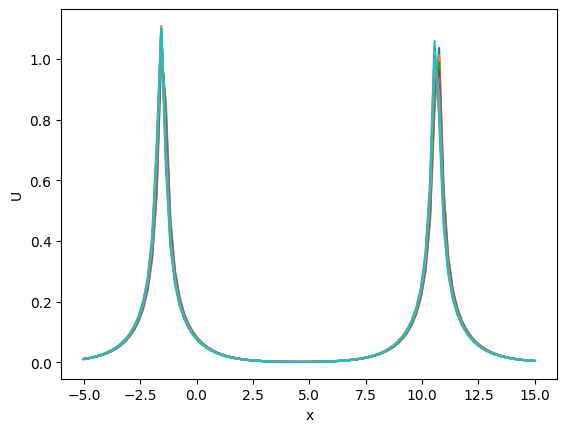

In [14]:


for mk in range(0 , N, 10):
  plt.plot(x_space, UU[mk, :])
  plt.xlabel("x")
  plt.ylabel("U")
  print((  (x_space[-1]- x_space[0] )/N ) * np.sum(UU[mk, :]**2))



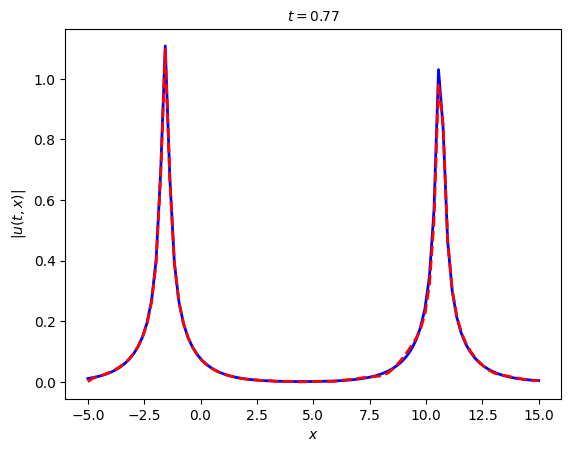

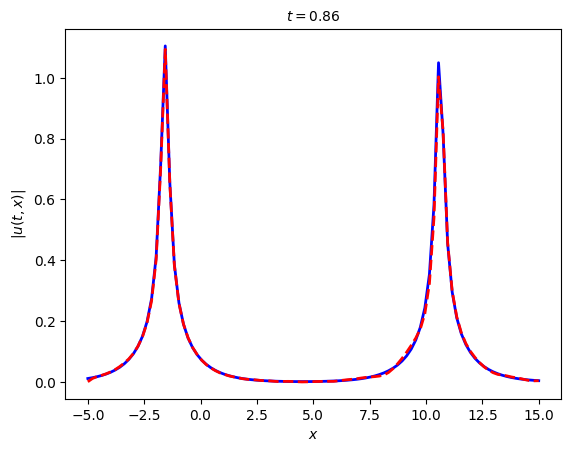

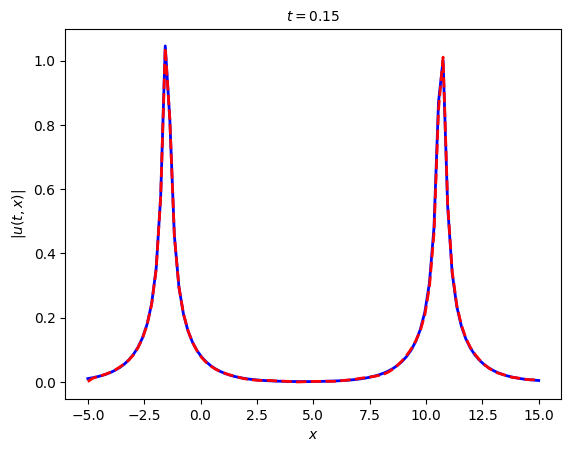

In [17]:
plt.plot(x_space, UU[76,:], 'b-', linewidth = 2, label = 'Exact')
plt.plot(x_space, U_predicted[76,:], 'r--', linewidth = 2, label = 'Prediction')
plt.xlabel('$x$')
plt.ylabel('$|u(t,x)|$')
plt.title('$t = %.2f$' % (t_space[76]), fontsize = 10)
plt.savefig("compare11b2ss.pdf", dpi='figure', transparent = True)
plt.show()

plt.plot(x_space, UU[85,:], 'b-', linewidth = 2, label = 'Exact')
plt.plot(x_space, U_predicted[85,:], 'r--', linewidth = 2, label = 'Prediction')
plt.xlabel('$x$')
plt.ylabel('$|u(t,x)|$')
plt.title('$t = %.2f$' % (t_space[85]), fontsize = 10)
plt.savefig("compare22b2ss.pdf", dpi='figure', transparent = True)
plt.show()


plt.plot(x_space, UU[15,:], 'b-', linewidth = 2, label = 'Exact')
plt.plot(x_space, U_predicted[15,:], 'r--', linewidth = 2, label = 'Prediction')
plt.xlabel('$x$')
plt.ylabel('$|u(t,x)|$')
plt.title('$t = %.2f$' % (t_space[15]), fontsize = 10)
plt.savefig("compare33b2ss.pdf", dpi='figure', transparent = True)
plt.show()

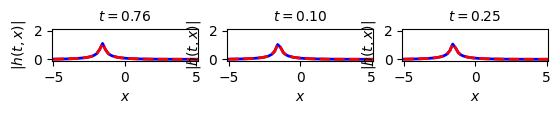

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.interpolate import griddata
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable



#gs1 = gridspec.GridSpec(1, 3)
#gs1.update(top=1-1/3, bottom=0, left=0.1, right=0.9, wspace=0.5)




ax = plt.subplot(1,3,1)
ax.plot(x_space, UU[75,:], 'b-', linewidth = 2, label = 'Exact')
ax.plot(x_space, U_predicted[75,:], 'r--', linewidth = 2, label = 'Prediction')
ax.set_xlabel('$x$')
ax.set_ylabel('$|h(t,x)|$')
ax.set_title('$t = %.2f$' % (t_space[75]), fontsize = 10)
ax.axis('square')
ax.set_xlim([-5.1,5.1])
ax.set_ylim([-0.1,2.1])

ax = plt.subplot(1,3,2)
ax.plot(x_space, UU[10, :], 'b-', linewidth = 2, label = 'Exact')
ax.plot(x_space, U_predicted[10, :], 'r--', linewidth = 2, label = 'Prediction')
ax.set_xlabel('$x$')
ax.set_ylabel('$|h(t,x)|$')
ax.axis('square')
ax.set_xlim([-5.1,5.1])
ax.set_ylim([-0.1,2.1])
ax.set_title('$t = %.2f$' % (t_space[10]), fontsize = 10)
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.8), ncol=5, frameon=False)

ax = plt.subplot(1,3,3)
ax.plot(x_space, UU[25, :], 'b-', linewidth = 2, label = 'Exact')
ax.plot(x_space, U_predicted[25, :], 'r--', linewidth = 2, label = 'Prediction')
ax.set_xlabel('$x$')
ax.set_ylabel('$|h(t,x)|$')
ax.axis('square')
ax.set_xlim([-5.1,5.1])
ax.set_ylim([-0.1,2.1])
ax.set_title('$t = %.2f$' % (t_space[25]), fontsize = 10)

plt.savefig("compare_three.png", dpi='figure', transparent = True)

plt.show()